In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(""), ".."))

In [2]:
from app.imager import ImageLoader, DefectViewer
from app.transforms import FFT, IFFT, Show, CreateMask

## Loading images
### ImageLoader init

        :param shuffle: Shuffle the samples before
        :param defect_class: 
            None -> all defect classes. 
            List -> ['FrontGridInterruption', 'Closed'], just these classes. 
            string -> 'FrontGridInterruption', one class. Applicable only to << operator

Usage
```python
    img = ImageLoader()
    img.load_n(n=10)  # Loads 10 images of the all classes
    img.load_n(n=10, defect_classes)  # Same as shown in the param defect_class
    # Shift left operator as shown below
````

In [3]:
# Load 10 images of class 'FrontGridInterruption'
n_samples = 3  # Number of samples of images
image_df = ImageLoader(defect_class='FrontGridInterruption') << n_samples  # Load n_sample images of class 'FrontGridInterruption'

## Viewing defects
### DefectViewer init
        :param il_obj: Object of ImageLoader. Default(None)
        :param resize_shape: Shape to resize the images when Default(224, 224)
Usage
```python
    img = ImageLoader()
    img.load_n(n=10)  # Loads 10 images of the all classes
    
    dv = DefectViewer(img)
    dv.view_defects(sample_df=None, group_by='defect_class', annotation_type='segmentations')
    # Shift left operator as shown below
````

In [4]:
# Get n_samples of the defect type 'FrontGridInterruption' and return an image array
images = DefectViewer() << image_df

## Performing an FFT
### FFT init
        :param dim:
        :param axis: Which dimension(s) to perform FFT on. 
                When dim is 2 then axis should be a tuple. Default is the last two dimensions. 
                When dim is 1 then axis should be an integer dimension.
        :param return_which: 
                If 'both' (default) then returns (orig_img, magnitude, phase). 
                If 'magnitude' then return only (orig_img, , magnitude). 
                If 'phase' then return only (orig_img, , phase)
Usage
```python
    fft = FFT()
    fft.fft2(images)  # Performs 2D FFT and returns orgin images, magnitude and pahse
    
    # Shift left operator as shown below
````

In [5]:
# FFT the images and get a tuple (original_img, magnitude and phase)
fft_images = FFT(dim=2) << images

## Displaying/Save Images
### Show init
        :param save_filename: Filename to save the output
        :param do_show: Display a plot or not
Usage
```python
    show = Show()
    show.show(images)
    
    # Shift left operator as shown below
````

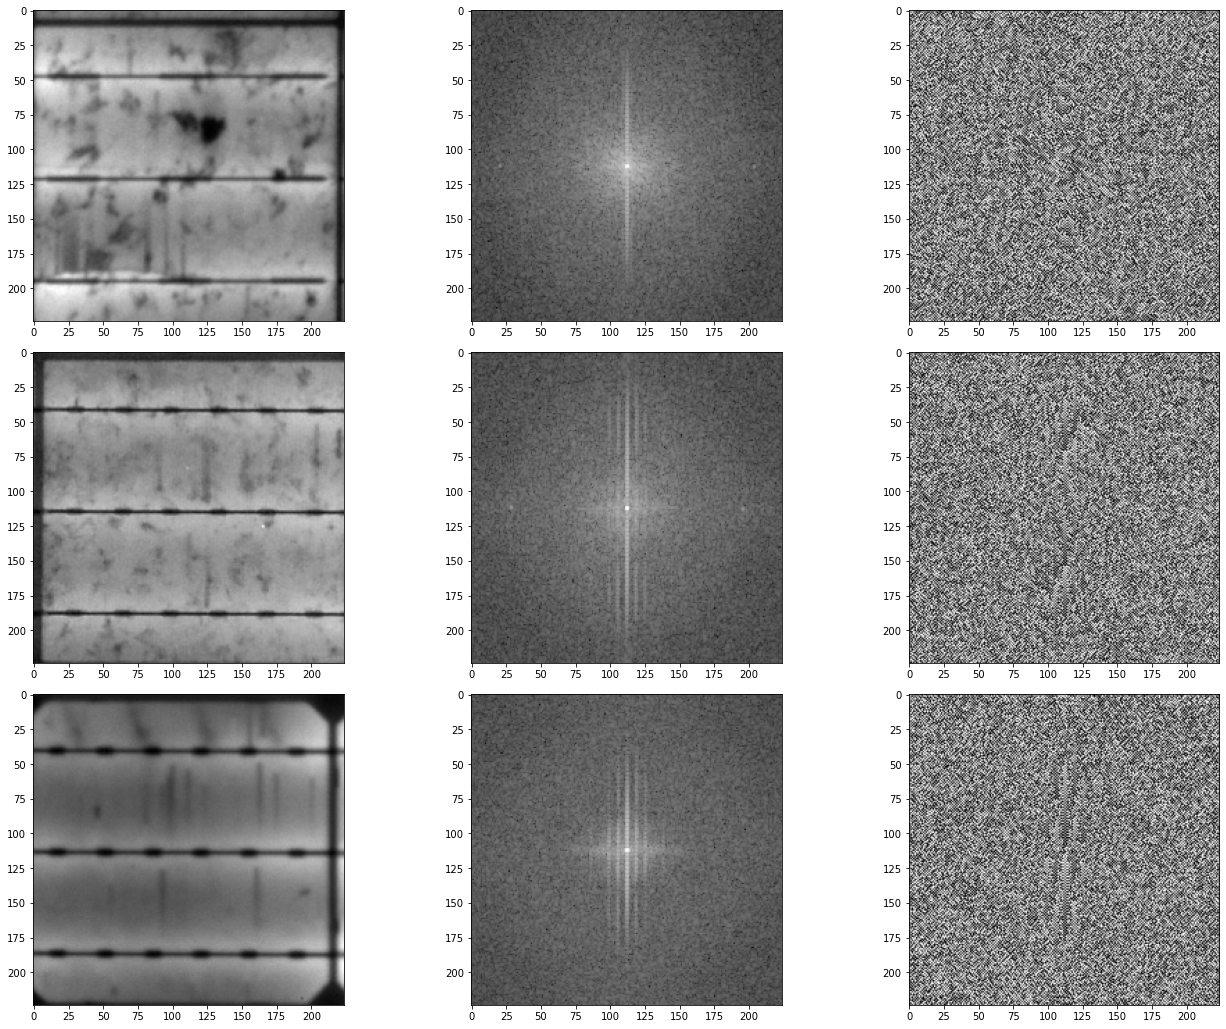

In [6]:
# Display the images
fft_images = Show(do_show=True) << fft_images

## Inverse FFT
### IFFT init
        :param mask: A mask for masking out the amplitude
Usage
```python
    ifft = IFFT()
    ifft.ifft(fft_images)
    
    # Shift left operator as shown below
````

In [7]:
inv_images = IFFT() << fft_images

## Putting it all together
### Read from left to right
#### 1. Load n_samples of defect_class
#### 2. Load the images associated with it
#### 3. Perform an FFT on the data
#### 4. Save it to file FFT and do not display it
#### 5. Perform an inverse FFT without a mask
#### 6. Save an file inverse FFFt and display to screen

In [8]:
%matplotlib inline
n_samples = 3 
images = Show('inv_fft', do_show=True) << (IFFT() << (Show('fft', do_show=True) << (FFT(dim=2) << (DefectViewer() << (ImageLoader(defect_class='FrontGridInterruption') << n_samples)))))

In [9]:
print('Hi')

Hi
